In [198]:
import pandas as pd
import os

experiments = ['standard_prompting', 'chain_of_thought', 'direct_feedback']

model_name = "gpt-3.5-turbo"
# model_name = "gpt-4"

data = [pd.read_csv('../results/' + model_name + '/' + experiment + '.csv') for experiment in experiments]
data = pd.concat(data).T.fillna(0)
data.loc['method'] = data.loc[data.index[0]]
print(data)
# data.columns = experiments
data = data.drop([data.index[0]])

                                  0                   1                   2  \
Unnamed: 0       standard_prompting  standard_prompting  standard_prompting   
1d_move_1p                      1.0                 1.0                 1.0   
choices                           1                   2                   3   
input_tokens                 129607              129607              129607   
output_tokens               45289.1             90578.2            135867.3   
1d_move_3p                        0                 1.0                 2.0   
1d_fill                           0                   0                   0   
1d_move_dp                        0                   0                   0   
1d_move_2p                        0                   0                   0   
1d_hollow                         0                   0                   0   
1d_flip                           0                   0                   0   
1d_denoising_1c                   0                 

In [199]:
categories_names = "Move 1,Move 2,Move 3,Move Dynamic,Move 2 Towards,Fill,Padded Fill,Hollow,Flip,Mirror,Denoise,Denoise Multicolor,Pattern Copy,Pattern Copy Multicolor,Recolor by Odd Even,Recolor by Size,Recolor by Size Comparison,Scaling".split(',')
categories_dirs = "1d_move_1p,1d_move_2p,1d_move_3p,1d_move_dp,1d_move_2p_dp,1d_fill,1d_padded_fill,1d_hollow,1d_flip,1d_mirror,1d_denoising_1c,1d_denoising_mc,1d_pcopy_1c,1d_pcopy_mc,1d_recolor_oe,1d_recolor_cnt,1d_recolor_cmp,1d_scale_dp".split(',')


In [200]:
tokens = data.loc[['method', 'choices', 'input_tokens', 'output_tokens']]
tokens


,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,0,1,2,3,4
method,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,chain_of_thought,chain_of_thought,chain_of_thought,chain_of_thought,chain_of_thought,direct_feedback,direct_feedback,direct_feedback,direct_feedback,direct_feedback
choices,1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,1,2,3,4,5
input_tokens,129607,129607,129607,129607,129607,129607,129607,129607,129607,129607,143122,143122,143122,143122,143122,129964,308737,528124,789198,1092075
output_tokens,45289.1,90578.2,135867.3,181156.4,226445.5,271734.6,317023.7,362312.8,407601.9,452891.0,165003.4,330006.8,495010.2,660013.6,825017.0,45080.0,88221.0,132960.0,177407.0,223007.0


In [201]:
data = data.drop(['method', 'choices', 'input_tokens', 'output_tokens'])
data

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,0,1,2,3,4
1d_move_1p,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,6.0,6.0,6.0,0,1.0,2.0,2.0,2.0
1d_move_3p,0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0
1d_fill,0,0,0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0,0,0,0,0
1d_move_dp,0,0,0,0,0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0
1d_move_2p,0,0,0,0,0,0,0,1.0,2.0,2.0,0,1.0,1.0,1.0,1.0,0,0,0,0,0
1d_hollow,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0,3.0,5.0,7.0,1.0,1.0,2.0,2.0,2.0
1d_flip,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,0,0,0,0,0
1d_denoising_1c,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,0,0,0,0,0
1d_denoising_mc,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0,0,0,0,0
1d_move_2p_dp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0


In [202]:
totals = data.sum(axis=0)
totals

0     1.0
1     2.0
2     3.0
3     5.0
4     7.0
5     8.0
6     8.0
7    10.0
8    13.0
9    14.0
0     6.0
1    14.0
2    17.0
3    19.0
4    22.0
0     3.0
1     4.0
2     6.0
3     6.0
4     7.0
dtype: object

In [203]:
rate = totals/900
rate

0    0.001111
1    0.002222
2    0.003333
3    0.005556
4    0.007778
5    0.008889
6    0.008889
7    0.011111
8    0.014444
9    0.015556
0    0.006667
1    0.015556
2    0.018889
3    0.021111
4    0.024444
0    0.003333
1    0.004444
2    0.006667
3    0.006667
4    0.007778
dtype: object

In [204]:
tokens.loc['rate'] = 100*rate
tokens

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,0,1,2,3,4
method,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,standard_prompting,chain_of_thought,chain_of_thought,chain_of_thought,chain_of_thought,chain_of_thought,direct_feedback,direct_feedback,direct_feedback,direct_feedback,direct_feedback
choices,1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,1,2,3,4,5
input_tokens,129607,129607,129607,129607,129607,129607,129607,129607,129607,129607,143122,143122,143122,143122,143122,129964,308737,528124,789198,1092075
output_tokens,45289.1,90578.2,135867.3,181156.4,226445.5,271734.6,317023.7,362312.8,407601.9,452891.0,165003.4,330006.8,495010.2,660013.6,825017.0,45080.0,88221.0,132960.0,177407.0,223007.0
rate,0.111111,0.222222,0.333333,0.555556,0.777778,0.888889,0.888889,1.111111,1.444444,1.555556,0.666667,1.555556,1.888889,2.111111,2.444444,0.333333,0.444444,0.666667,0.666667,0.777778


In [205]:
if model_name == "gpt-3.5-turbo":
    tokens.loc['cost'] = tokens.loc['input_tokens']*0.0000005 + tokens.loc['output_tokens']*0.0000015
if model_name == "gpt-4":
    tokens.loc['cost'] = tokens.loc['input_tokens']*0.00003 + tokens.loc['output_tokens']*0.00006
tokens.T

,method,choices,input_tokens,output_tokens,rate,cost
0,standard_prompting,1,129607,45289.1,0.111111,0.132737
1,standard_prompting,2,129607,90578.2,0.222222,0.200671
2,standard_prompting,3,129607,135867.3,0.333333,0.268604
3,standard_prompting,4,129607,181156.4,0.555556,0.336538
4,standard_prompting,5,129607,226445.5,0.777778,0.404472
5,standard_prompting,6,129607,271734.6,0.888889,0.472405
6,standard_prompting,7,129607,317023.7,0.888889,0.540339
7,standard_prompting,8,129607,362312.8,1.111111,0.608273
8,standard_prompting,9,129607,407601.9,1.444444,0.676206
9,standard_prompting,10,129607,452891.0,1.555556,0.74414


In [206]:
plot = tokens.T.copy()
# plot['method'] = plot.index
plot


,method,choices,input_tokens,output_tokens,rate,cost
0,standard_prompting,1,129607,45289.1,0.111111,0.132737
1,standard_prompting,2,129607,90578.2,0.222222,0.200671
2,standard_prompting,3,129607,135867.3,0.333333,0.268604
3,standard_prompting,4,129607,181156.4,0.555556,0.336538
4,standard_prompting,5,129607,226445.5,0.777778,0.404472
5,standard_prompting,6,129607,271734.6,0.888889,0.472405
6,standard_prompting,7,129607,317023.7,0.888889,0.540339
7,standard_prompting,8,129607,362312.8,1.111111,0.608273
8,standard_prompting,9,129607,407601.9,1.444444,0.676206
9,standard_prompting,10,129607,452891.0,1.555556,0.74414


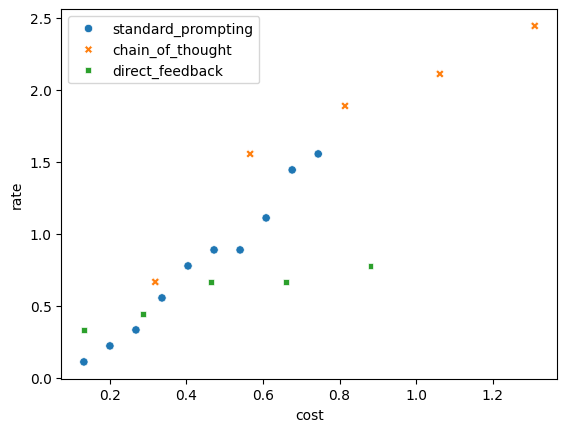

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(plot, x='cost', y='rate', style='method', hue='method')
plt.legend(loc='upper left')

In [216]:
# dic = data.to_dict()

# import pandas as pd
# data = pd.DataFrame(categories_passed, index = [storage_dir]).to_csv(storage_path + storage_dir + '.csv')

categories_names = "Move 1,Move 2,Move 3,Move Dynamic,Move 2 Towards,Fill,Padded Fill,Hollow,Flip,Mirror,Denoise,Denoise Multicolor,Pattern Copy,Pattern Copy Multicolor,Recolor by Odd Even,Recolor by Size,Recolor by Size Comparison,Scaling".split(',')
categories_dirs = "1d_move_1p,1d_move_2p,1d_move_3p,1d_move_dp,1d_move_2p_dp,1d_fill,1d_padded_fill,1d_hollow,1d_flip,1d_mirror,1d_denoising_1c,1d_denoising_mc,1d_pcopy_1c,1d_pcopy_mc,1d_recolor_oe,1d_recolor_cnt,1d_recolor_cmp,1d_scale_dp".split(',')

# print(categories_passed)
# print(categories_seen)
# print(n, n_passed)
# print()

ch = [10, 5, 5]

complete = pd.concat([data, pd.DataFrame([[0]*20]*(len(categories_dirs) - len(data)), columns=data.columns)])

totals = data.sum()

for k, ex in enumerate(experiments) :

    print("""
\\begin{table}[h]
    \centering""")
    print("""
    \\caption{%s number of successful functions per task category out of 50 by number of choices with %s}
    """%(ex.replace('_', ' ').capitalize(), model_name))
    print("\\begin{tabular}{|l|" + "|".join(["c"]*ch[k])+"|}")
    print("\\hline")

    print("\\hfill \\textbf{Choice} & " + " & ".join([ str(a) for a in range(1, ch[k]+1)]) + "  \\\\ \\hline")
    print("\\textbf{Task category} & \multicolumn{%i}{c|}{} \\\\ \\hline"%ch[k])

    for i, category in enumerate(categories_dirs):
        try:
            print(categories_names[i], end='')
            for j in range(sum(ch[:k]), sum(ch[:k+1])):
                print(' &', int(data.T.iloc[j][category]), end='')
            print("\\\\ \\hline")
        except:
            for j in range(sum(ch[:k]), sum(ch[:k+1])):
                print(' & 0', end='')
            print("\\\\ \\hline")
    print('\\hline\\textbf{Mean success rate (%)} &'," & ".join([ "\\textbf{"+ str(round(100*complete.sum().iloc[j]/900.0, 2)) + "}" for j in range(sum(ch[:k]), sum(ch[:k+1]))]), ' \\\\ \\hline')
    print('\\textbf{Standard deviation} &'," & ".join([ "\\textbf{"+ str(round(100*complete.std().iloc[j]/50.0, 3)) + "}" for j in range(sum(ch[:k]), sum(ch[:k+1]))]), ' \\\\ \\hline')
    print("\\end{tabular}")
    print("""
    \\label{tab:tab_results_%s}
\end{table}"""%(ex+'_'+model_name))


\begin{table}[h]
    \centering

    \caption{Standard prompting number of successful functions per task category out of 50 by number of choices with gpt-3.5-turbo}
    
\begin{tabular}{|l|c|c|c|c|c|c|c|c|c|c|}
\hline
\hfill \textbf{Choice} & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10  \\ \hline
\textbf{Task category} & \multicolumn{10}{c|}{} \\ \hline
Move 1 & 1 & 1 & 1 & 2 & 2 & 2 & 2 & 2 & 2 & 3\\ \hline
Move 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 2 & 2\\ \hline
Move 3 & 0 & 1 & 2 & 2 & 3 & 3 & 3 & 4 & 4 & 4\\ \hline
Move Dynamic & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 2 & 2\\ \hline
Move 2 Towards & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline
Fill & 0 & 0 & 0 & 1 & 2 & 2 & 2 & 2 & 2 & 2\\ \hline
Padded Fill & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline
Hollow & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1\\ \hline
Flip & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline
Mirror & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline
Denoise & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline
Denoise Multicol

In [209]:
ch_ = [5, 5, 5]

for k,ex in enumerate(experiments):
    print("""
\\begin{table}[h]
    \centering""")
    print("""
    \\caption{%s used tokens, success rate and costs per number of choices with %s}
    """%(ex.replace('_', ' ').capitalize(), model_name))
    print("\\begin{tabular}{|l|" + "|".join(["c"]*ch[k])+"|}")
    print("\\hline")

    print("\\hfill \\textbf{Number of choices} & " + " & ".join([ str(a) for a in range(1, ch_[k]+1)]) + "  \\\\ \\hline")
    print('\\hline\\textbf{Input tokens} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['input_tokens'].iloc[j], 3)) + "}" for j in range(sum(ch_[:k]), sum(ch_[:k+1]))]), ' \\\\ \\hline')
    print('\\textbf{Output tokens} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['output_tokens'].iloc[j])) + "}" for j in range(sum(ch_[:k]), sum(ch_[:k+1]))]), ' \\\\ \\hline')
    print('\\textbf{Mean success rate (\\%)} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['rate'].iloc[j], 3)) + "}" for j in range(sum(ch_[:k]), sum(ch_[:k+1]))]), ' \\\\ \\hline')
    print('\\textbf{Cost in \\$} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['cost'].iloc[j], 3)) + "}" for j in range(sum(ch_[:k]), sum(ch_[:k+1]))]), ' \\\\ \\hline')
    print('\\textbf{Benefit-cost ratio} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['rate'].iloc[j]/tokens.loc['cost'].iloc[j], 3)) + "}" for j in range(sum(ch_[:k]), sum(ch_[:k+1]))]), ' \\\\ \\hline')

    if k == 0:
        print("\\hline \\hfill \\textbf{Number of choices} & " + " & ".join([ str(a) for a in range(6, ch[k]+1)]) + "  \\\\ \\hline")
        print('\\hline\\textbf{Input tokens} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['input_tokens'].iloc[j], 3)) + "}" for j in range(5, sum(ch[:k+1]))]), ' \\\\ \\hline')
        print('\\textbf{Output tokens} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['output_tokens'].iloc[j])) + "}" for j in range(5, sum(ch[:k+1]))]), ' \\\\ \\hline')
        print('\\textbf{Mean success rate (\\%)} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['rate'].iloc[j], 3)) + "}" for j in range(5, sum(ch[:k+1]))]), ' \\\\ \\hline')
        print('\\textbf{Cost in \\$} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['cost'].iloc[j], 3)) + "}" for j in range(5, sum(ch[:k+1]))]), ' \\\\ \\hline')
        print('\\textbf{Benefit-cost ratio} &'," & ".join([ "\\textbf{"+ str(round(tokens.loc['rate'].iloc[j]/tokens.loc['cost'].iloc[j], 3)) + "}" for j in range(5, sum(ch[:k+1]))]), ' \\\\ \\hline')
        ch_ = ch

    print("\\end{tabular}")
    print("""
    \\label{tab:tab_bcr_%s}
\end{table}"""%(ex+'_'+model_name))


\begin{table}[h]
    \centering

    \caption{Standard prompting used tokens, success rate and costs per number of choices with gpt-3.5-turbo}
    
\begin{tabular}{|l|c|c|c|c|c|c|c|c|c|c|}
\hline
\hfill \textbf{Number of choices} & 1 & 2 & 3 & 4 & 5  \\ \hline
\hline\textbf{Input tokens} & \textbf{129607} & \textbf{129607} & \textbf{129607} & \textbf{129607} & \textbf{129607}  \\ \hline
\textbf{Output tokens} & \textbf{45289} & \textbf{90578} & \textbf{135867} & \textbf{181156} & \textbf{226446}  \\ \hline
\textbf{Mean success rate (\%)} & \textbf{0.111} & \textbf{0.222} & \textbf{0.333} & \textbf{0.556} & \textbf{0.778}  \\ \hline
\textbf{Cost in \$} & \textbf{0.133} & \textbf{0.201} & \textbf{0.269} & \textbf{0.337} & \textbf{0.404}  \\ \hline
\textbf{Benefit-cost ratio} & \textbf{0.837} & \textbf{1.107} & \textbf{1.241} & \textbf{1.651} & \textbf{1.923}  \\ \hline
\hline \hfill \textbf{Number of choices} & 6 & 7 & 8 & 9 & 10  \\ \hline
\hline\textbf{Input tokens} & \textbf{129607} 

<Axes: xlabel='choices', ylabel='Benefit-cost ratio'>

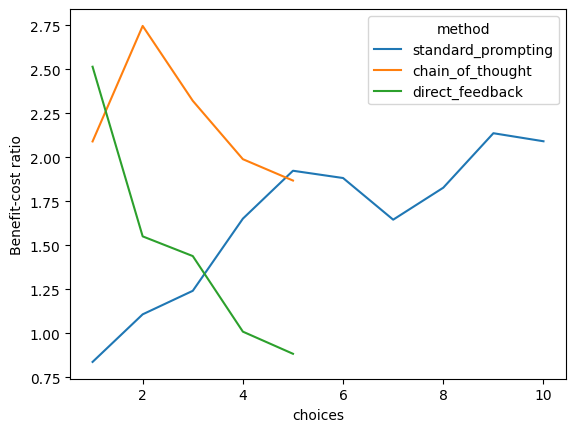

In [210]:
tokens.loc['Benefit-cost ratio'] = tokens.loc['rate']/tokens.loc['cost']
sns.lineplot(data=tokens.T, x='choices', y='Benefit-cost ratio', hue='method')
# tokens